In [11]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

%load_ext autoreload
%autoreload 2

plt.rcParams['figure.figsize'] = (13.0, 9) # set default size of plots

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
train_X = np.load('../data/q3_train_X.npy')
train_y = np.load('../data/q3_train_y.npy')

y = train_y.reshape(train_y.shape[0], 1)

In [3]:
def robust_loss(X, y, delta):
    pred_error = y - X
    loss = 1 + (pred_error ** 2) / (delta ** 2)
    loss = (delta ** 2) * (np.sqrt(loss) - 1)
    loss = loss.reshape(X.shape[0])

    return loss

def squared_loss(X, y):
    loss = (y - X) ** 2
    return loss

X = train_X

pred_error = (y - X)
pred_error = pred_error.reshape(pred_error.shape[0])

r_losses = robust_loss(X, y, delta=0.1), robust_loss(X, y, delta=1), robust_loss(X, y, delta=10)

s_loss = squared_loss(X, y)
s_loss = s_loss.reshape(s_loss.shape[0])

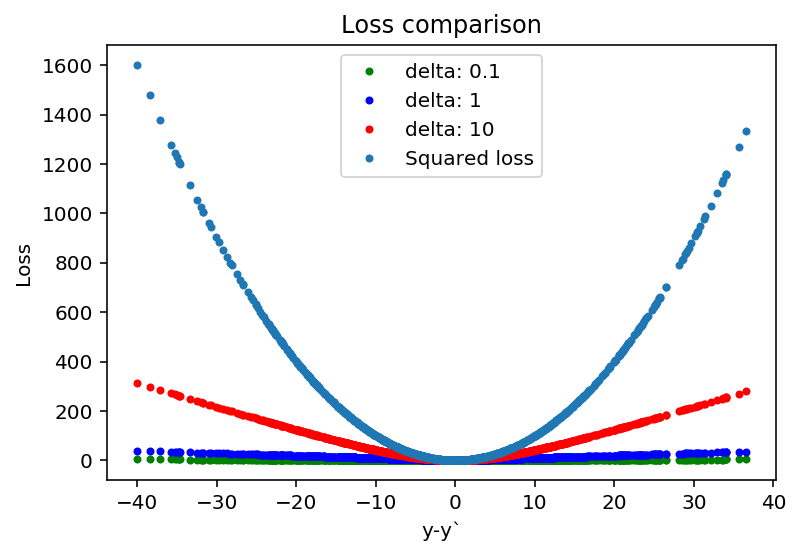

In [4]:
plt.title('Loss comparison')
plt.xlabel('y-y`')
plt.ylabel('Loss')

plt.plot(pred_error, r_losses[0], 'g.', label='delta: 0.1')
plt.plot(pred_error, r_losses[1], 'b.', label='delta: 1')
plt.plot(pred_error, r_losses[2], 'r.', label='delta: 10') 
plt.plot(pred_error, s_loss, '.', label='Squared loss')

plt.legend(loc='best')

plt.show()

In [6]:
from augmented_linear_regression import AugmentedLinearRegression

def compute_mse(y, y_prime):
    N = y.shape[0]
    return np.sum((y - y_prime) ** 2) / N

model = AugmentedLinearRegression(delta = 1)

# With approx_grad, loss is 388.664
model.fit(train_X, train_y)
r_W, r_b = model.get_params()

y_pred_r = model.predict(train_X)

print('MSE:', compute_mse(y_pred_r, train_y))

Final Loss value: 3333.234602209122
[9.63152279] -0.15450497091939194
MSE: 114.89058423455927


In [7]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()

linear_model.fit(train_X, train_y)
y_pred = linear_model.predict(train_X)

mean_squared_err = compute_mse(y_pred, train_y)
print(mean_squared_err)

76.0431153827088


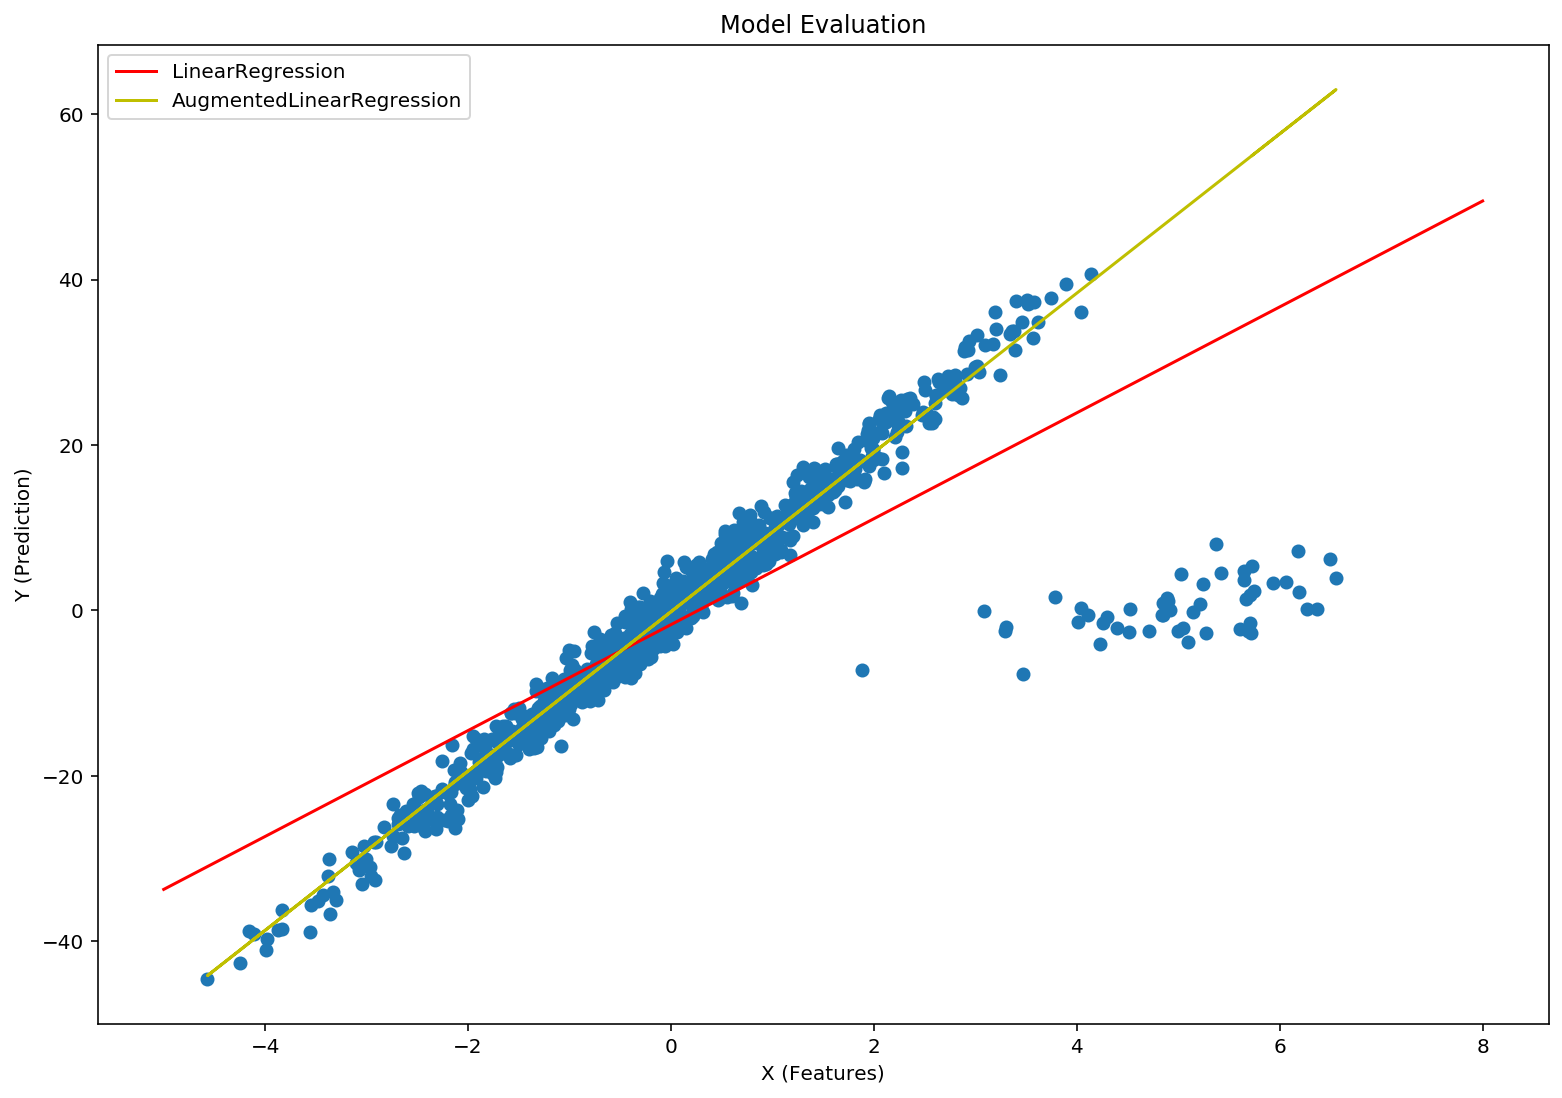

In [12]:
plt.scatter(train_X, train_y)

x = np.linspace(-5,8,100)
y = linear_model.coef_ * x + linear_model.intercept_

plt.title('Model Evaluation')
plt.xlabel('X (Features)')
plt.ylabel('Y (Prediction)')

plt.plot(x, y, '-r', label='LinearRegression')
plt.plot(train_X, y_pred_r, '-y', label='AugmentedLinearRegression')
plt.legend(loc='best')
plt.show()